In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Hypothesis Testing Revisited

The power of a hypothesis test depends on the sample size and the effect size. So, a smaller sample size can detect a large effect size. On the other hand, a large sample size can detect a tiny effect size.

This means that if you are working with a large sample (as you often are when doing data analysis), you can uncover a statistically significant result, which is of no practial importance. 

For example, clinical trial researchers sometimes refer to this low power when a result is statistically significant but not "clinically significant." They mean by this that one treatment may be better than placebo, but the difference is so marginal that it would make no difference to the patient within a clinical context.

## Measuring Effect Size

Let's borrow an example from https://www.leeds.ac.uk/educol/documents/00002182.htm.

Dr. Simon Fokard was trying to determine whether children learn better in the morning or afternoon.

A group of 38 children were included in the experiment. 

Half were randomly allocated to listen to a story and answer questions about it (on tape) at 9am, the other half to hear exactly the same story and answer the same questions at 3pm. 

Their comprehension was measured by the number of questions answered correctly out of 20.

Morning group average: 15.2

Afternoon group average: 17.9

Difference between group averages: 2.7

But, just knowing the difference between group averages doesn't reveal the whole story. There are many ways that the populations could be distributed and still have a difference between means of 2.7. Let's look at two possible scenarios.

**Scenario 1: Little to no overlap between groups.**

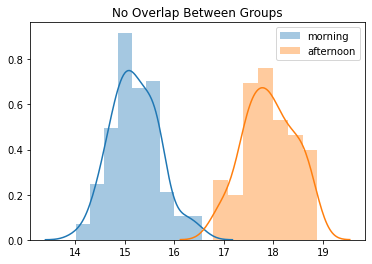

In [8]:
morning_group = np.random.normal(loc = 15.2, scale = 0.5, size = 100)
afternoon_group = np.random.normal(loc = 17.9, scale = 0.5, size = 100)

fig, ax = plt.subplots()
sns.distplot(morning_group, ax = ax, label = 'morning')
sns.distplot(afternoon_group, ax = ax, label = 'afternoon')
plt.title('No Overlap Between Groups')
plt.legend();

**Scenario 2: Significant Overlap Between Groups**

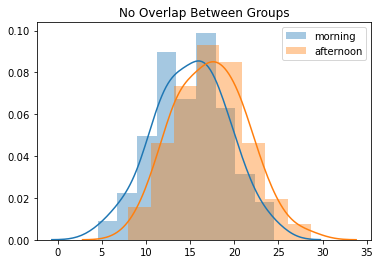

In [11]:
morning_group = np.random.normal(loc = 15.2, scale = 4, size = 100)
afternoon_group = np.random.normal(loc = 17.9, scale = 4, size = 100)

fig, ax = plt.subplots()
sns.distplot(morning_group, ax = ax, label = 'morning')
sns.distplot(afternoon_group, ax = ax, label = 'afternoon')
plt.title('No Overlap Between Groups')
plt.legend();

**Comment on the difference between these two possible scenarios. For which scenario does the difference between morning and afternoon means seem more significant?**

**What changes about the distributions from scenario 1 to scenario 2?**

**Fill in your answers here.**

If we want to quantify not just whether or not there is a statistically significant difference between the mean of two populations, but the size of the difference in a normalized way, we can calculate an **effect size**.

The most common way to measure effect size is through the use of **Cohen's $d$**. Say we have two samples with sample means $\bar{x}_1$ and $\bar{x}_2$. Then Cohen's $d$ is equal to 
$$\text{Cohen's } d = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

where $s$ is a measure of the standard deviation, usually the *pooled* standard deviation, given by

$$s = \sqrt{\frac{s_1^2 + s_2^2}{2}}$$

where $s_1$ and $s_2$ are the sample standard deviations for each sample separately.

| Effect Size ($d$) | Interpretation |
|-------------------|----------------|
|0.01|Very small|
|0.2|Small|
|0.5|Medium|
|0.8|Large|
|1.2|Very large|

**Question:** Between scenario 1 and scenario 2 above, which has a larger effect size? Why?

**Fill in your answer here.**

In reality, for this experiment, the pooled standard deviation was 3.3. This means that the effect size was equal to

$$\frac{17.9 - 15.2}{3.3} = 0.8$$

The table above lists this as a large effect size, but how can we understand what this means? 

One way to understand it is that the average person in the afternoon group scored 0.8 standard deviations higher than the average person in the morning group.

If the data is reasonably close to normally-distributed, you can further interpret this difference. For simplicity, we can normalize the distributions to have standard deviation 1.

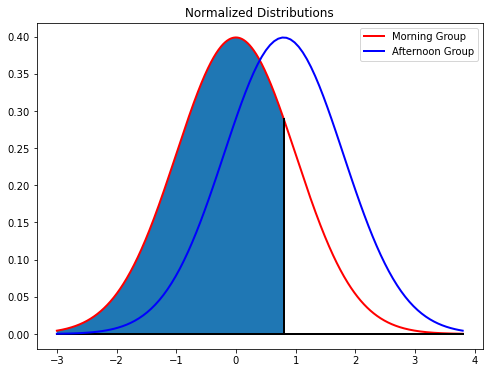

In [25]:
norm_dist = norm()
x = np.linspace(-3, 3.8, 1000)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, norm_dist.pdf(x), 'k-', lw=2, color = 'red', label = 'Morning Group')

x = np.linspace(-3, 0.8, 100)

ax.fill_between(x[x <= 0.8], 0, norm_dist.pdf(x[x <= 0.8]))

plt.plot([0.8, 0.8], [0,norm_dist.pdf(0.8)], color = 'black', linewidth = 2);

plt.plot([-3, 3.8], [0,0], color = 'black', linewidth = 2)

afternoon_dist = norm(loc = 0.8)
x = np.linspace(-3, 3.8, 100)
ax.plot(x, afternoon_dist.pdf(x), 'k-', lw=2, color = 'blue', label = 'Afternoon Group')

plt.title('Normalized Distributions')
plt.legend();

**Question:** Assuming the above picture accurately represents the true distribution in the morning group and afternoon group, what proportion of the morning group scores lower than the group average of the afternoon group; i.e. what is the area of the shaded region?

**Hint:** You may want to use a cumulative distribution function.

In [30]:
norm.cdf(0.8)

## norm.cdf(0.8, loc = 0, scale = 1)

0.7881446014166034

Another question you can as is "What is the probability that when choosing a person at random from the morning group and a person at random from the afternoon group, the person from the afternoon group will score higher?"

To answer this, you'll use the fact that if two variables are normally distributed, then so too is the distribution of all possible differences between those variables, and the variance of the obtained normal distribution is equal to the sum of the individual variances.

In scary-looking notation, that is if
$A \sim N(\mu_1, \sigma_1)$ and $B \sim N(\mu_2, \sigma_2)$, then $A-B \sim N(\mu_1 - \mu_2, \sqrt{\sigma_1^2 + \sigma_2^2})$

To answer the question about the morning and afternoon groups, you can use two normal distributions with standard deviation 1, where the second is located 0.8 standard deviations to the right of the first.

In [46]:
diff_dist = norm(loc = 0.8, scale = np.sqrt(2))

Now, you can find the probability that the afternoon observation is larger than the morning observation (i.e., that the difference if more than zero) by using the cdf for `diff_dist`:

In [47]:
1 - diff_dist.cdf(0)

0.7141961775233342

This shows that for an effect size of 0.8, there is a 71.4% chance that a randomly chosen person from the afternoon will have a higher score than a randomly chosen person from the morning group.

What if the effect size had only been 0.1? What percentage of individuals in the morning group would have scored below the average for the afternoon group?

In [48]:
norm.cdf(0.1)

0.539827837277029

This difference seems of much less practial significance (even though it was statistically significant).

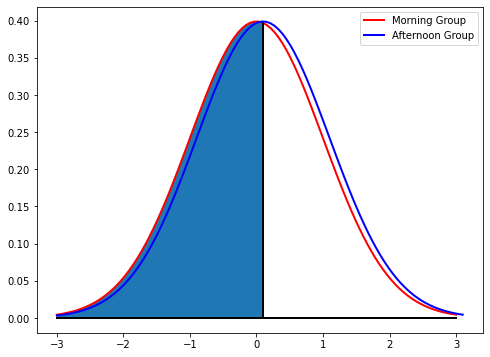

In [49]:
norm_dist = norm()
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, norm_dist.pdf(x), 'k-', lw=2, color = 'red', label = 'Morning Group')

x = np.linspace(-3, 0.1, 100)

ax.fill_between(x[x <= 0.1], 0, norm_dist.pdf(x[x <= 0.1]))

plt.plot([0.1, 0.1], [0,norm_dist.pdf(0.1)], color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2)

afternoon_dist = norm(loc = 0.1)
x = np.linspace(-3, 3.1, 100)
ax.plot(x, afternoon_dist.pdf(x), 'k-', lw=2, color = 'blue', label = 'Afternoon Group')


plt.legend();

And what is the probability that a randomly chosen person from the afternoon group scores higher than a randomly chosen person from the morning group?

In [50]:
diff_dist = norm(loc = 0.1, scale = np.sqrt(2))

1 - diff_dist.cdf(0)

0.5281859888985083

For a small effect size, there is only a 53% chance that a randomly chosen person from the afternoon group will have a higher score than a randomly chosen person from the morning group.

Let's look at another example. The following dataset has a larger sample of sleeping times by sex from the American Time Use Survey.

In [51]:
import pandas as pd
sleeping_times = pd.read_csv('../data/atus_sleeping_large_sample.csv')

In [55]:
sleeping_times.head()

,participant_id,minutes_spent_sleeping,sex
0,20180101180006,480,Male
1,20180101180021,450,Male
2,20180101180025,845,Male
3,20180101180054,615,Male
4,20180101180108,540,Male


You can inspect the distribution of sleeping times by using a box plot.

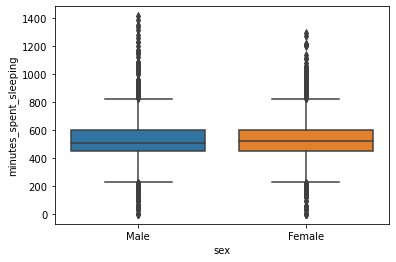

In [54]:
sns.boxplot(data = sleeping_times, x = 'sex', y = 'minutes_spent_sleeping');

**What do you notice from the box plot?**

**Fill in your observations here.**

You can also inspect the data using summary statistics.

In [52]:
sleeping_times.groupby('sex').minutes_spent_sleeping.agg(['mean', 'std', 'count'])

,mean,std,count
sex,,,
Female,533.543128,136.714122,5275
Male,525.830477,139.155526,4318


**What can you gather from the summary statistics?**

**Fill in your observations here.**

Now, let's test and see if the observed differenct is statistically significant.

First, set up the null and alternative hypotheses. Remember that the null hypothesis says that there is no difference between the population means. Let $\mu_M$ represent the average time spent sleeping by males and $\mu_F$ represent the average time spent sleeping by females.

**Null Hypothesis:**

$H_0: \mu_M = \mu_F$

**Alternative Hypothesis:**

$H_A: \mu_M < \mu_F$

In [56]:
from scipy.stats import ttest_ind
t_results = ttest_ind(sleeping_times.loc[sleeping_times.sex == 'Male', 'minutes_spent_sleeping'],
                      sleeping_times.loc[sleeping_times.sex == 'Female', 'minutes_spent_sleeping'],
                     equal_var = False)

Here, you are doing a one-sided test, so you need to divide the $p$-value by 2.

In [57]:
print(t_results.pvalue / 2)

0.00324950546985067


This says that, if there is no difference in population means, then you would see a difference as large as you did only 0.3% of the time. This means that you need to reject the null hypothesis and conclude that there is statistically significant evidence that females sleep more on average than males.

But, let's find the effect size to put some context to our finding.

In [43]:
pooled_std = np.sqrt((
    np.std(sleeping_times.loc[sleeping_times.sex == 'Male', 'minutes_spent_sleeping'])**2 + 
    np.std(sleeping_times.loc[sleeping_times.sex == 'Female', 'minutes_spent_sleeping'])**2) / 2) 

cohen_d = (np.mean(sleeping_times.loc[sleeping_times.sex == 'Female', 'minutes_spent_sleeping']) - 
           np.mean(sleeping_times.loc[sleeping_times.sex == 'Male', 'minutes_spent_sleeping'])) / pooled_std
print(cohen_d)

0.055918891809883776


This effect size is tiny. Remember we saw above that the observed difference is less than 8 minutes, but the standard deviation values are around 137, so the observed difference, while statistically significant, is tiny compared to the overall variability in the data.

**Question: Based on the calculated effect size, what proportion of males slept for fewer minutes than the average female?**

In [58]:
norm.cdf(cohen_d)

0.5222967895557225

Standardize and plot the assumed population distributions to get an idea of the effect that you have uncovered.

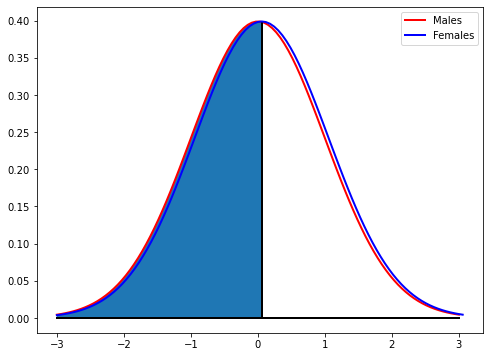

In [59]:
effect_size = cohen_d

norm_dist = norm()
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, norm_dist.pdf(x), 'k-', lw=2, color = 'red', label = 'Males')

x = np.linspace(-3, effect_size, 100)

ax.fill_between(x[x <= effect_size], 0, norm_dist.pdf(x[x <= effect_size]))

plt.plot([effect_size, effect_size], [0,norm_dist.pdf(0.1)], color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2)

afternoon_dist = norm(loc = effect_size)
x = np.linspace(-3, 3 + effect_size, 100)
ax.plot(x, afternoon_dist.pdf(x), 'k-', lw=2, color = 'blue', label = 'Females')


plt.legend();

**Question: If we randomly choose a male and randomly choose a female, how likely is it that the chosen male slept less than the chosen female?**

In [60]:
diff_dist = norm(loc = cohen_d, scale = np.sqrt(2))

1 - diff_dist.cdf(0)

0.5157703186539964